In [1]:
from google.colab import files

uploaded=files.upload()

Saving Musical_instruments_reviews.csv to Musical_instruments_reviews.csv


In [1]:
import pandas as pd
df = pd.read_csv('Musical_instruments_reviews.csv')
df = df.head(2000)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
1995,A1YBZOWO2RBIUZ,B0002F6RSM,Pantanga34,"[1, 1]",When I was looking for a Bass Case I just want...,4.0,Great for the Price,1373155200,"07 7, 2013"
1996,A1EVEQAR05SY7L,B0002F6RSM,W. Perry,"[0, 0]",These are by no means touring cases. They're i...,4.0,A great 'storage' and gig case,1395964800,"03 28, 2014"
1997,AJCHGS1GND4OA,B0002F73YY,Bloose,"[0, 0]",I had a Cannon brand clutch and I bought this ...,5.0,Good design and well made,1395187200,"03 19, 2014"
1998,A1R019TURAPFDS,B0002F73YY,camden108,"[0, 0]","It works well as a standard clutch, as a drop ...",4.0,alright,1364860800,"04 2, 2013"


In [2]:
df = df.drop(columns=['reviewerID', 'asin', 'reviewerName', 'helpful', 'summary', 'unixReviewTime', 'reviewTime'])

In [3]:
df.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [4]:
df.loc[df['overall'] >= 4, 'review'] = 'Good'
df.loc[df['overall'] == 3, 'review'] = 'Decent'
df.loc[df['overall'] < 3, 'review'] = 'Bad'

In [5]:
df.head()

,reviewText,overall,review
0,"Not much to write about here, but it does exac...",5.0,Good
1,The product does exactly as it should and is q...,5.0,Good
2,The primary job of this device is to block the...,5.0,Good
3,Nice windscreen protects my MXL mic and preven...,5.0,Good
4,This pop filter is great. It looks and perform...,5.0,Good


In [6]:
category = pd.get_dummies(df.review)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['review','overall'])
df_baru

,reviewText,Bad,Decent,Good
0,"Not much to write about here, but it does exac...",0,0,1
1,The product does exactly as it should and is q...,0,0,1
2,The primary job of this device is to block the...,0,0,1
3,Nice windscreen protects my MXL mic and preven...,0,0,1
4,This pop filter is great. It looks and perform...,0,0,1
...,...,...,...,...
1995,When I was looking for a Bass Case I just want...,0,0,1
1996,These are by no means touring cases. They're i...,0,0,1
1997,I had a Cannon brand clutch and I bought this ...,0,0,1
1998,"It works well as a standard clutch, as a drop ...",0,0,1


In [7]:
review = df_baru['reviewText'].values
label = df_baru[['Bad', 'Decent', 'Good']].values

In [8]:
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)
 
sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [12]:
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks], 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/20
50/50 - 31s - loss: 0.6009 - accuracy: 0.8838 - val_loss: 0.3367 - val_accuracy: 0.9175
Epoch 2/20
50/50 - 28s - loss: 0.4232 - accuracy: 0.8944 - val_loss: 0.3300 - val_accuracy: 0.9175
Epoch 3/20
50/50 - 29s - loss: 0.3879 - accuracy: 0.8944 - val_loss: 0.3297 - val_accuracy: 0.9175
Epoch 4/20
50/50 - 28s - loss: 0.2665 - accuracy: 0.8994 - val_loss: 0.4129 - val_accuracy: 0.9100
Epoch 5/20
50/50 - 29s - loss: 0.1558 - accuracy: 0.9356 - val_loss: 0.5636 - val_accuracy: 0.9100
Epoch 6/20
50/50 - 29s - loss: 0.1177 - accuracy: 0.9488 - val_loss: 0.8184 - val_accuracy: 0.9175
Epoch 7/20
50/50 - 29s - loss: 0.0917 - accuracy: 0.9550 - val_loss: 0.9007 - val_accuracy: 0.8950

Akurasi telah mencapai >95%!


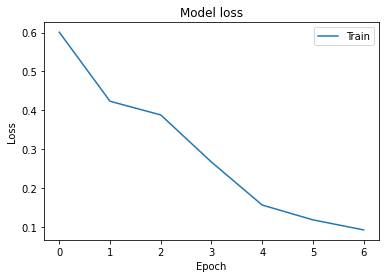

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

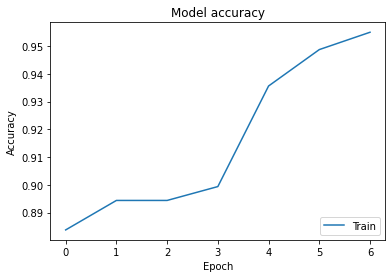

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()